# Gaussian Mixture Model

GMM runs on 5 features by default: beam, gate, time, velocity, and spectral  
width. It performs well overall, even on clusters that are not well-separated   
in space and time. However, it will often create clusters that are too high  
variance,causing it to pull in scattered points that do not look like they  
should be clustered together - see the fanplots in cluster.ipynb. It is also   
slow, taking 5-10 minutes for one day of data.  

Parameters for each algorithm are set to default values (shown below), but can  
be modified using the class constructor.

### Optional arguments for GMM class constructor

     n_clusters=30
         The number of GMM clusters to create.
         
     cov='full'
         The covariance matrix to use for GMM.
         See this post for more details: 
         https://stats.stackexchange.com/questions/326671/different-covariance-types-for-gaussian-mixture-models
         
     features=['beam', 'gate', 'time', 'vel', 'wid'] 
         Names of the features for GMM to run on. Can also include 'elv'.
         
     BoxCox=False
         If BoxCox=True, 'wid' and 'vel' will be BoxCox transformed to   
         convert them from an exponential distribution to a Gaussian.

In [2]:
from algorithms.gmm import GMM
import datetime

start_time = datetime.datetime(2017, 3, 13)
end_time = datetime.datetime(2017, 3, 14)
gmm = GMM(start_time, end_time, 'cvw', n_clusters=30, BoxCox=False, load_model=False, save_model=True)
print(gmm.runtime)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


454.3253228664398


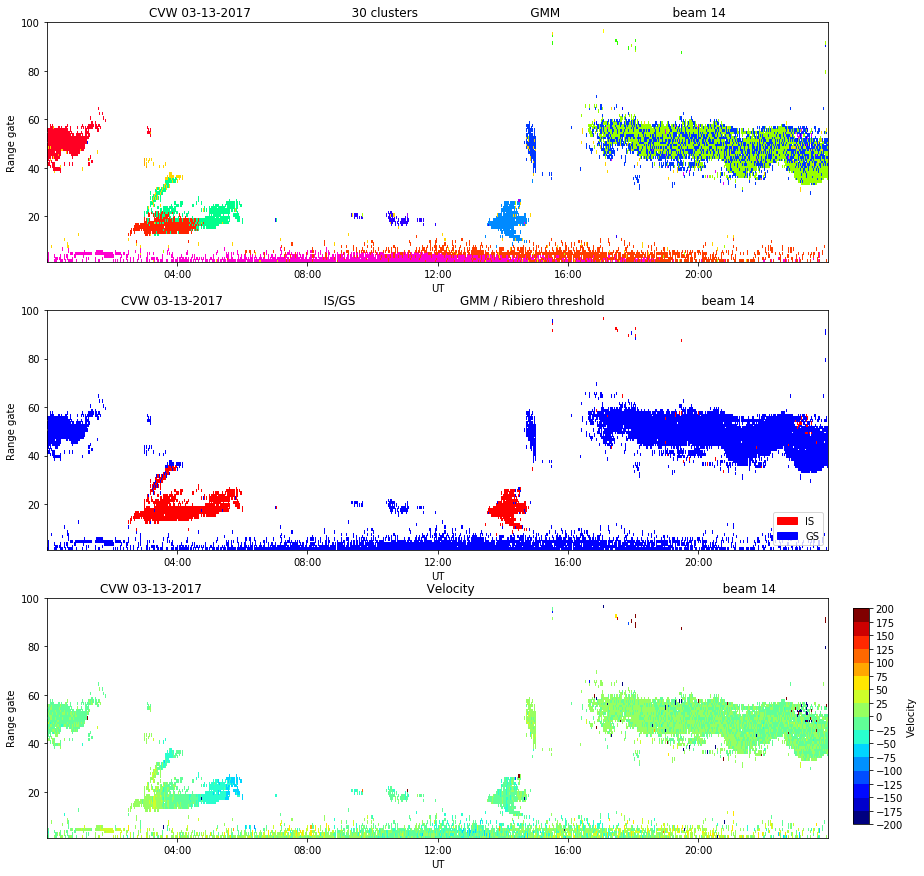

Exception: 2017-04-04 04:00:00 thru 2017-04-04 04:00:00 is not contained in data

In [3]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
gmm.plot_rti(14, 'Ribiero', save_fig=True)           # Slooow
# Make fanplots of the individual clusters over some time period
fanplot_start = datetime.datetime(2017, 4, 4, 4, 0, 0)
fanplot_end = datetime.datetime(2017, 4, 4, 4, 0, 0)
gmm.plot_fanplots(fanplot_start, fanplot_end, save_fig=True)